In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.externals import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

In [2]:
CI = pd.read_csv("CI.csv")

In [3]:
CI.head()

,START.DATE,END.DATE,CONTACT.TYPE,Contacts
0,2010-01-01,2010-01-01,Call - Input,84
1,2010-01-02,2010-01-02,Call - Input,236
2,2010-01-02,2010-01-03,Call - Input,1
3,2010-01-03,2010-01-03,Call - Input,182
4,2010-01-03,2010-01-04,Call - Input,1


In [4]:
CI.describe()

,Contacts
count,3092.000000
mean,1993.459897
std,1734.735551
min,1.000000
25%,119.000000
50%,2712.000000
75%,3555.250000
max,5571.000000


In [5]:
CI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 4 columns):
START.DATE      3092 non-null object
END.DATE        3092 non-null object
CONTACT.TYPE    3092 non-null object
Contacts        3092 non-null int64
dtypes: int64(1), object(3)
memory usage: 96.7+ KB


In [20]:
import datetime
t =datetime.datetime(2000, 1, 1, 0, 0)
(t-datetime.datetime(1970,1,1)).total_seconds()

946684800.0

In [17]:
CI['START.DATE'] = CI['START.DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

In [18]:
CI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 4 columns):
START.DATE      3092 non-null datetime64[ns]
END.DATE        3092 non-null object
CONTACT.TYPE    3092 non-null object
Contacts        3092 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 96.7+ KB


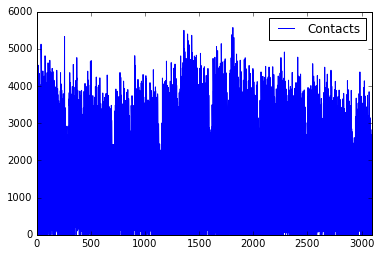

In [19]:
CI.plot()
plt.show()

In [34]:
#CI.iloc[0,0]
#int (CI.iloc[0,0].strftime("%d"))

(CI.iloc[0,0]-datetime.datetime(1970,1,1)).total_seconds()

1262304000.0

In [35]:
CI['NEW_SECONDS'] = CI['START.DATE'].apply(lambda x: (x-datetime.datetime(2010,1,1)).total_seconds())

In [36]:
CI.head()

,START.DATE,END.DATE,CONTACT.TYPE,Contacts,NEW_SECONDS
0,2010-01-01,2010-01-01,Call - Input,84,0.0
1,2010-01-02,2010-01-02,Call - Input,236,86400.0
2,2010-01-02,2010-01-03,Call - Input,1,86400.0
3,2010-01-03,2010-01-03,Call - Input,182,172800.0
4,2010-01-03,2010-01-04,Call - Input,1,172800.0


In [37]:
sum_fin = CI.groupby(['NEW_SECONDS'],as_index=False).sum()

In [40]:
sum_fin.to_csv("CI_Seconds.csv")

In [41]:
sum_fin.head()

,NEW_SECONDS,Contacts
0,0.0,84
1,86400.0,237
2,172800.0,183
3,259200.0,3716
4,345600.0,2864


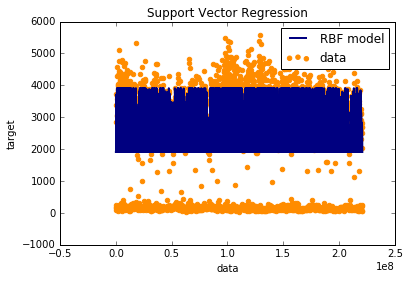

In [46]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
X =  sum_fin['NEW_SECONDS'].values
#print X
y = sum_fin['Contacts'].values

#print y
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
#y_lin = svr_lin.fit(X, y).predict(X)
#y_poly = svr_poly.fit(X, y).predict(X)
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error
print mean_squared_error(y, y_rbf)

1007182.31359


In [48]:
from sklearn.externals import joblib
joblib.dump(svr_rbf, 'CI.pkl') 

['CI.pkl']

In [51]:
svr_rbf.score(X,y)

0.041990290706075066

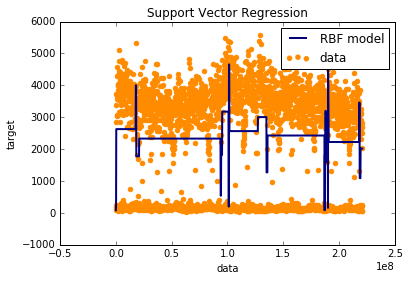

2521887.35252


In [50]:
FI = CI
FI.head()
import datetime
#FI['START.DATE'] = FI['START.DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
#FI.plot()
#plt.show()
#FI['NEW_SECONDS'] = FI['START.DATE'].apply(lambda x: (x-datetime.datetime(2010,1,1)).total_seconds())
sum_fin = FI.groupby(['NEW_SECONDS'],as_index=False).sum()
sum_fin.to_csv("VI_Seconds.csv")
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
X =  sum_fin['NEW_SECONDS'].values
#print X
y = sum_fin['Contacts'].values
from sklearn.tree import DecisionTreeRegressor
svr_rbf = DecisionTreeRegressor(max_depth=5)
#print y
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
#svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_lin = SVR(kernel='linear', C=1e3)
#svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
#y_lin = svr_lin.fit(X, y).predict(X)
#y_poly = svr_poly.fit(X, y).predict(X)
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.hold('on')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
#plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
#plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()
from sklearn.metrics import mean_squared_error
print mean_squared_error(y, y_rbf)
from sklearn.externals import joblib
#joblib.dump(svr_rbf, 'VI.pkl') 

In [ ]:
CI['START.DATE'] = CI['START.DATE'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))